In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os

In [4]:
data = pd.read_csv(os.path.join("..", "..", "..", "data", "mpg.csv"))
x_train, x_test, y_train, y_test = train_test_split(data.drop(["mpg"],axis=1),data["mpg"])
train = pd.concat([x_train,y_train],axis=1)
test = pd.concat([x_test,y_test],axis=1)

In [5]:
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)

linreg = LinearRegression()
linreg.fit(x_train,y_train)

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

ensemble = VotingRegressor([("tree",DecisionTreeRegressor()),("linreg",LinearRegression()),("knn",KNeighborsRegressor())])
ensemble.fit(x_train,y_train)

VotingRegressor(estimators=[('tree', DecisionTreeRegressor()),
                            ('linreg', LinearRegression()),
                            ('knn', KNeighborsRegressor())])

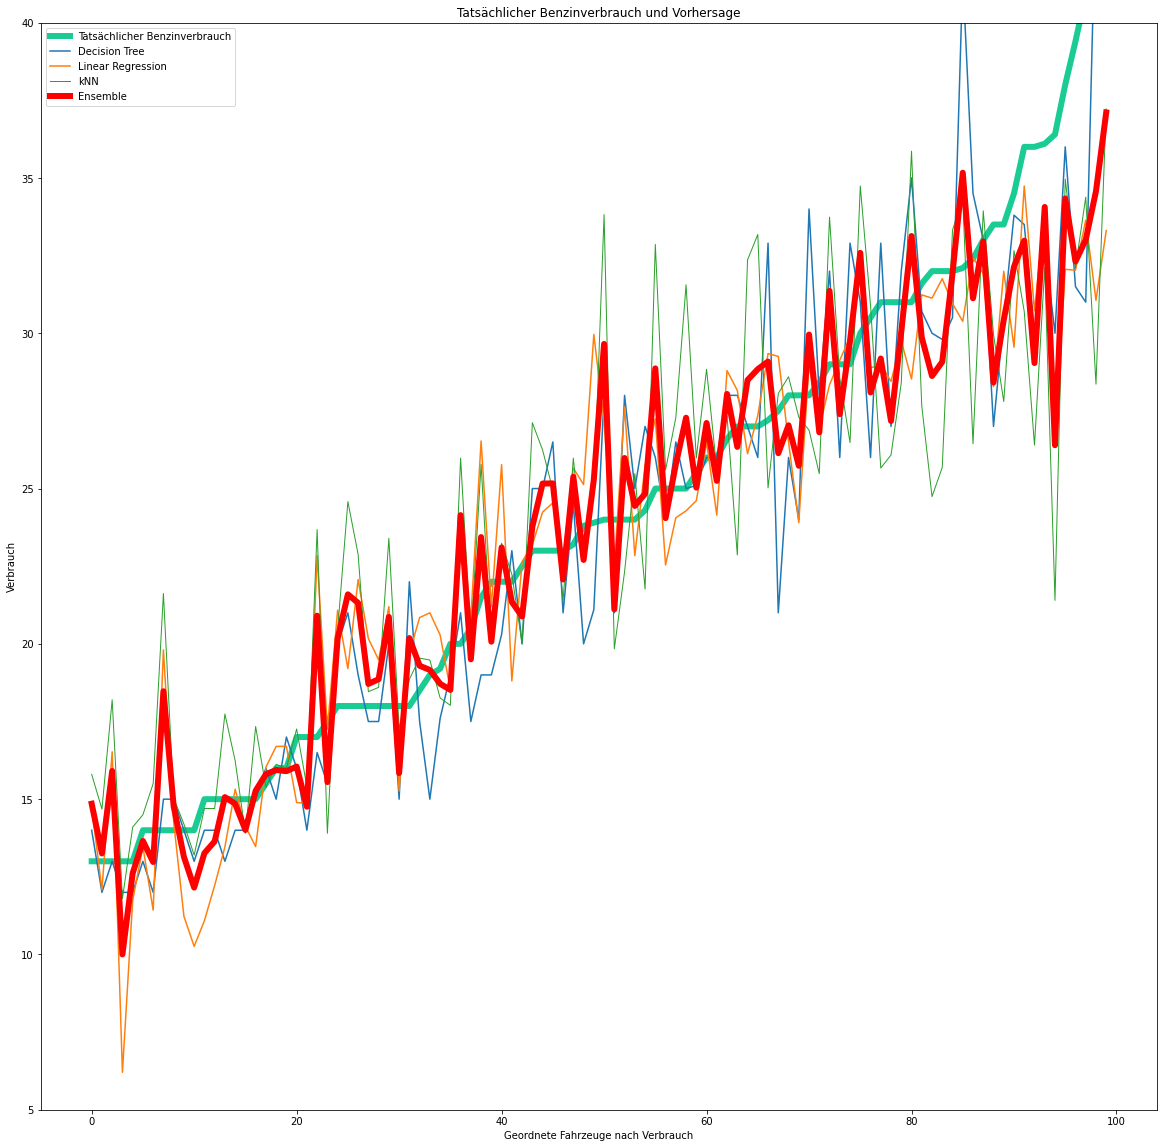

In [10]:
plt.figure(figsize=(20,20))
plt.title("Tatsächlicher Benzinverbrauch und Vorhersage")
plt.ylim([5,40])
plt.plot(range(0,len(test)),test.sort_values("mpg")["mpg"],color="#1ACC94",linewidth=6,label="Tatsächlicher Benzinverbrauch")
plt.plot(range(0,len(test)),tree.predict(test.sort_values("mpg").drop(["mpg"],axis=1)),label="Decision Tree")
plt.plot(range(0,len(test)),linreg.predict(test.sort_values("mpg").drop(["mpg"],axis=1)),label="Linear Regression")
plt.plot(range(0,len(test)),knn.predict(test.sort_values("mpg").drop(["mpg"],axis=1)),linewidth=1,label="kNN")
plt.plot(range(0,len(test)),ensemble.predict(test.sort_values("mpg").drop(["mpg"],axis=1)),color="r",linewidth=6,label="Ensemble")

plt.xlabel("Geordnete Fahrzeuge nach Verbrauch")
plt.ylabel("Verbrauch")
plt.legend()
plt.show()